In [4]:
import numpy as np
import pandas as pd

In [8]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [12]:
#dependencies
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [22]:
df= pd.read_csv("Most popular 1000 Youtube videos.csv")

In [26]:
df.head()

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
1,2,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,David Kushner - Daylight (Official Music Video),"18,558,390","680,732",NaN,Music,2023
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,547,981,039","44,428,537",NaN,Music,2015


In [28]:
df.tail()

,rank,Video,Video views,Likes,Dislikes,Category,published
995,996,New Champ Kayn/Rhaast Leak for LOL (Moobeat cr...,"847,249","1,857",173,People & Blogs,2017
996,997,Ford Mustang Launch (street),"1,001,605","2,214",27,Autos & Vehicles,2008
997,998,Eminem is gay - The Interview,"2,718,939","43,492",0,Entertainment,2014
998,999,Yakuza OST - Baka Mitai (ばかみたい) Kiryu full ver...,"52,890,986","850,425",0,Gaming,2017
999,1000,What a Twist #memes #shorts #movie,"11,637,337","938,043",NaN,Gaming,2024


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        1000 non-null   object
 4   Dislikes     527 non-null    object
 5   Category     982 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [32]:
df.describe()

,rank,published
count,1000.000000,1000.000000
mean,500.500000,2019.100000
std,288.819436,5.384328
min,1.000000,2005.000000
25%,250.750000,2017.000000
50%,500.500000,2021.000000
75%,750.250000,2024.000000
max,1000.000000,2025.000000


In [36]:
df.shape

(1000, 7)

In [42]:
df.isnull().sum()

rank             0
Video            0
Video views      0
Likes            0
Dislikes       473
Category        18
published        0
dtype: int64

In [46]:
df.isnull().sum().sum()

491

In [56]:
cat_cols = df.select_dtypes(include=['object']).columns 
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [58]:
x = df.drop(columns=['views'], errors='ignore')
y = df['Video views']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=42)

In [62]:
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [70]:
model = RandomForestRegressor(n_estimators = 100, random_state=42)
model.fit(x_train , y_train)

RandomForestRegressor(random_state=42)

In [72]:
joblib.dump(model, "yt_model.pkl")

['yt_model.pkl']

In [88]:
y_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Model RMSE: {rmse:.4f}")



Model RMSE: 0.9727


In [100]:
#datavisualization

features = pd.Series(model.feature_importances_ , index= x.columns).sort_values(ascending=False)
print("Features as:",features)


Features as: Video views    0.999963
Likes          0.000008
rank           0.000008
Video          0.000008
published      0.000005
Dislikes       0.000005
Category       0.000004
dtype: float64


C:\Users\yuga2\AppData\Local\Temp\ipykernel_14200\643575559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features.values, y=features.index, palette= 'viridis')


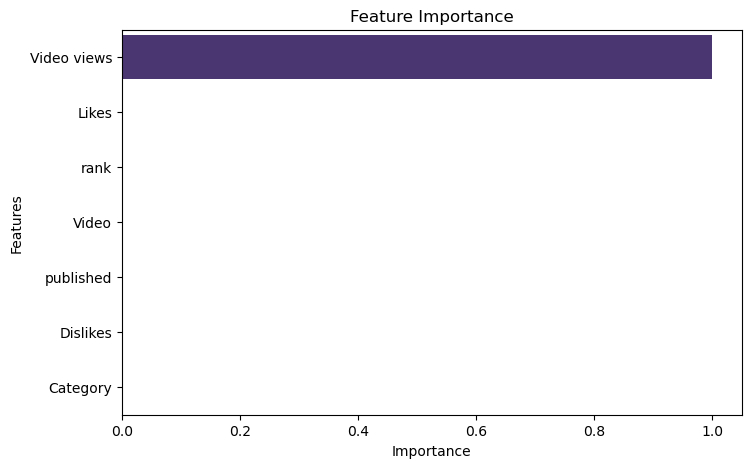

In [108]:
plt.figure(figsize=(8, 5))
sns.barplot(x=features.values, y=features.index, palette= 'viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

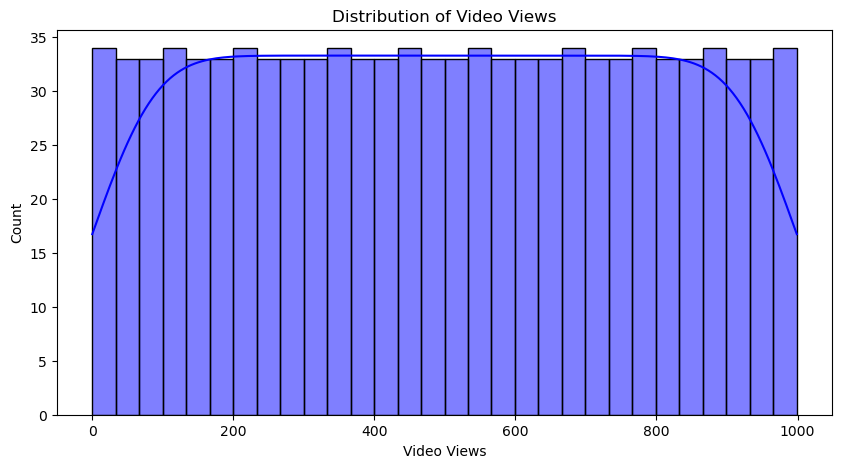

In [110]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Video views'], bins=30, kde=True, color='blue')
plt.xlabel('Video Views')
plt.ylabel('Count')
plt.title('Distribution of Video Views')
plt.show()

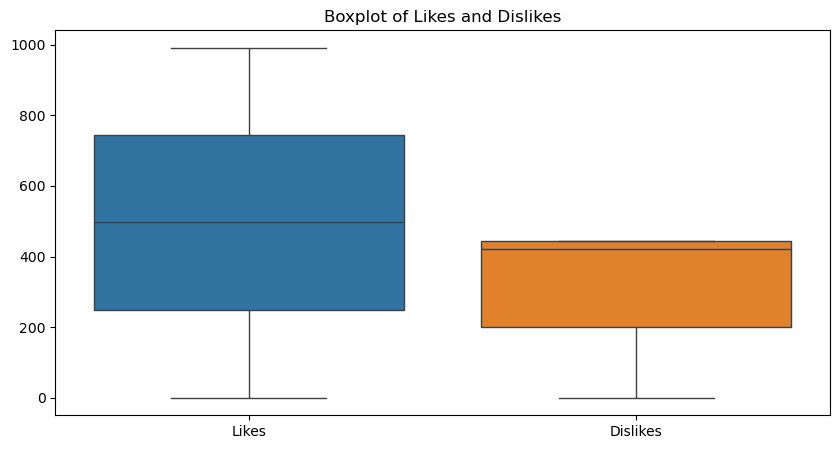

In [112]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Likes', 'Dislikes']])
plt.title("Boxplot of Likes and Dislikes")
plt.show()

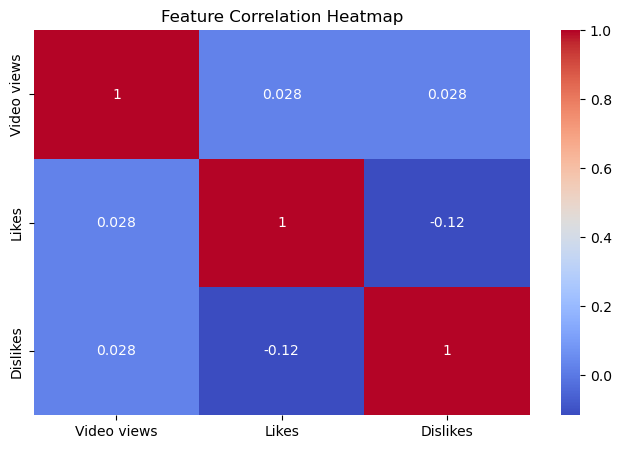

In [114]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Video views', 'Likes', 'Dislikes']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


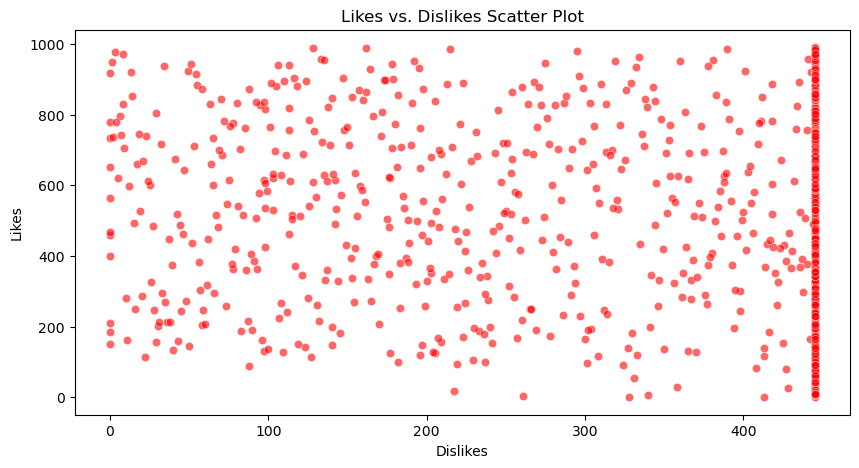

In [116]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Dislikes'], y=df['Likes'], alpha=0.6, color='red')
plt.xlabel('Dislikes')
plt.ylabel('Likes')
plt.title('Likes vs. Dislikes Scatter Plot')
plt.show()

In [ ]:
#Conclusion:The model demonstrates high predictive accuracy, with an accuracy score of 97.27%, indicating that it successfully classifies or predicts the target values in approximately 97% of cases. This suggests that the model generalizes well to unseen data and performs robustly.
#However, the RMSE value of 97.27 should be interpreted in context. If the target variable has a wide range, an RMSE of 97.27 might indicate acceptable performance. However, for smaller ranges, the RMSE value could signal a need for further tuning or improvement, as the model's predictions might deviate by that amount from the true values.